<font size = 6>
Отбор данных одномерной выборки

Выполнил - Карабалин Руслан

Цель работы - очистка данных одномерной выборки, то есть поиск и удаление
аномальных значений.

# Введение

Импортируем данные и выведем первые несколько строк

In [112]:
ds0 <- read.csv("AD.ds1.csv")
head(ds0)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,⋯,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0843465,-0.2848840,0.9892421,4.19468539,-1.1032168,0.4382530,0.1513521,-3.8576415,1.1593217,4.972076,⋯,3.014904,1.030263062,0.6867673,1.0843465,-0.2848840,0.9892421,4.19468539,-1.1032168,0.4382530,0.1513521
2,2.1952296,-2.7398994,1.0935386,1.23146995,0.1220443,0.9684444,0.1608632,-0.9313827,0.9425394,7.105048,⋯,1.530475,-2.273279795,0.3636297,2.1952296,-2.7398994,1.0935386,1.23146995,0.1220443,0.9684444,0.1608632
3,0.7695802,0.7321299,1.0814257,0.64722286,1.1105126,0.9690887,0.1657771,1.8328283,1.0774021,6.228567,⋯,11.871290,-0.008667537,0.6534486,0.7695802,0.7321299,1.0814257,0.64722286,1.1105126,0.9690887,0.1657771
4,1.0514872,-0.6204620,0.9840112,0.06650523,-1.9362104,0.4777324,0.1795157,0.5706715,0.7731891,4.008374,⋯,6.215761,2.104168514,0.7159362,1.0514872,-0.6204620,0.9840112,0.06650523,-1.9362104,0.4777324,0.1795157
5,0.6803506,-1.0691225,0.8476439,1.39914029,-1.5883173,0.4783769,0.1805313,-5.3088372,1.0119005,4.229940,⋯,4.683767,-12.976766344,0.4034058,0.6803506,-1.0691225,0.8476439,1.39914029,-1.5883173,0.4783769,0.1805313
6,0.7006522,3.6758535,0.8600172,2.59963737,0.2358391,0.5263867,0.1832775,1.7778216,0.9151850,2.836141,⋯,4.455843,-0.321590268,0.5502235,0.7006522,3.6758535,0.8600172,2.59963737,0.2358391,0.5263867,0.1832775


Подключим библиотеку dplyr, при помощи функции select из этого пакета создадим отдельную таблицу на основе столбца, соответствующего варианту

In [113]:
library(dplyr)


ds182 <- select(ds0, contains("v82"))

Переименуем в полученной таблице столбец "v82" на "s82"

In [114]:
colnames(ds182) <- gsub("v", "s", colnames(ds182))

## Нахождение описательной статистики выборки

Вычислим среднее арифметическое, стандартное отклонение и медиану выборки, запишем полученные значения в соответствующие переменные:

In [115]:
mean_82 = mean(ds182$s82, na.rm = TRUE)
sd_82 = sd(ds182$s82, na.rm = TRUE)
median_82 = median(ds182$s82, na.rm = TRUE)

Установим пакет moments для вычисления выборочного коэффициента асимметрии:

In [116]:
install.packages("moments")
library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Вычислим выборочный коэффициент асимметрии при помощи функции skewness пакета moments и запишем в соответствующую переменную:

In [117]:
skewness_82 <- skewness(ds182$s82, na.rm = TRUE)

Создадим отдельную таблицу из этих характеристик:

In [118]:
characteristics <- data.frame(
  mean = mean_82,
  sd = sd_82,
  median = median_82,
  skewness = skewness_82
)
print(characteristics)

      mean       sd   median skewness
1 1.561735 1.720766 1.069783 3.847964


**mean** - выборочное среднее, т.е. оценка математического ожидания генеральной совокупности, представленной имеющейся выборкой.

**std** - выборочное cтандартное отклонение, т.е. оценка среднеквадратического отклонения генеральной совокупности, представленной имеющейся выборкой.

**median** - выборочная медиана, т.е. оценка медианы генеральной совокупности, представленной имеющейся выборкой.

**skew** - выборочный коэффициент асимметрии, т.е. оценка коэффициента асимметрии генеральной совокупности, представленной имеющейся выборкой.

# Визуализация данных

## Диаграмма рассеяния

Вычислим переменную index, содержащую номера строк таблицы ds182:

In [119]:
index <- 1:nrow(ds182)

Построим диаграмму рассеяния, расположив выборочные значения по горизонтальной оси, а значения переменной index - по вертикальной:

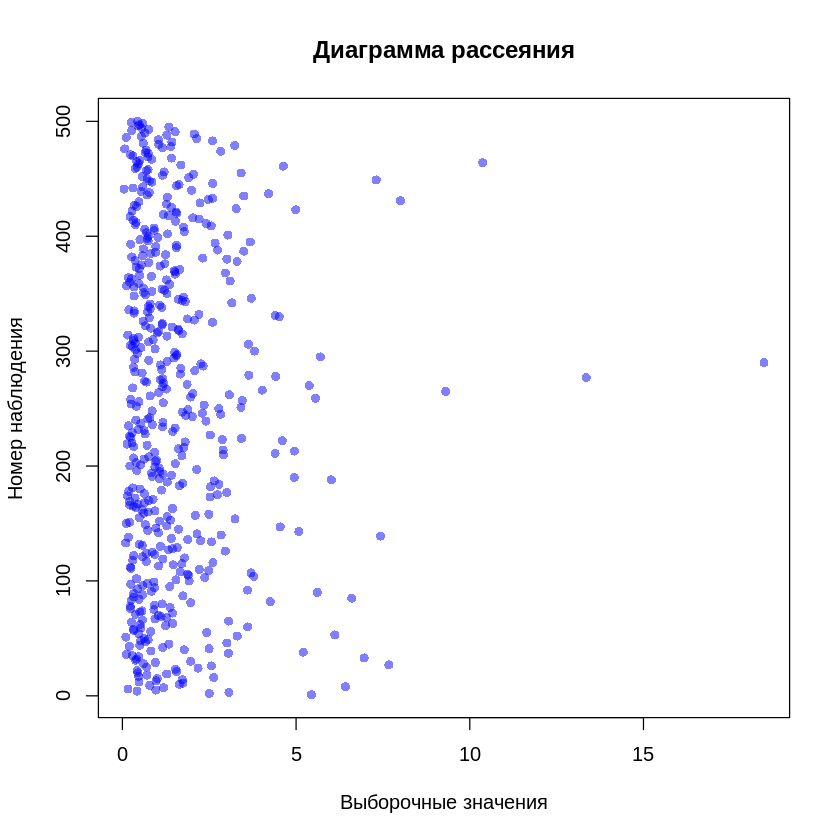

In [120]:
plot(ds182$s82, index, col=rgb(0, 0, 1, 0.5), main="Диаграмма рассеяния", xlab="Выборочные значения", ylab="Номер наблюдения", pch=16, )

- В выборке, скорее всего, есть аномальные данные

- Распределение генеральной совокупности, из которой взята выборка, несимметрично. Пологая часть графика плотности находится справа

## Диаграмма размаха

Построим диаграмму размаха, расположив выборочные значения по горизонтальной оси

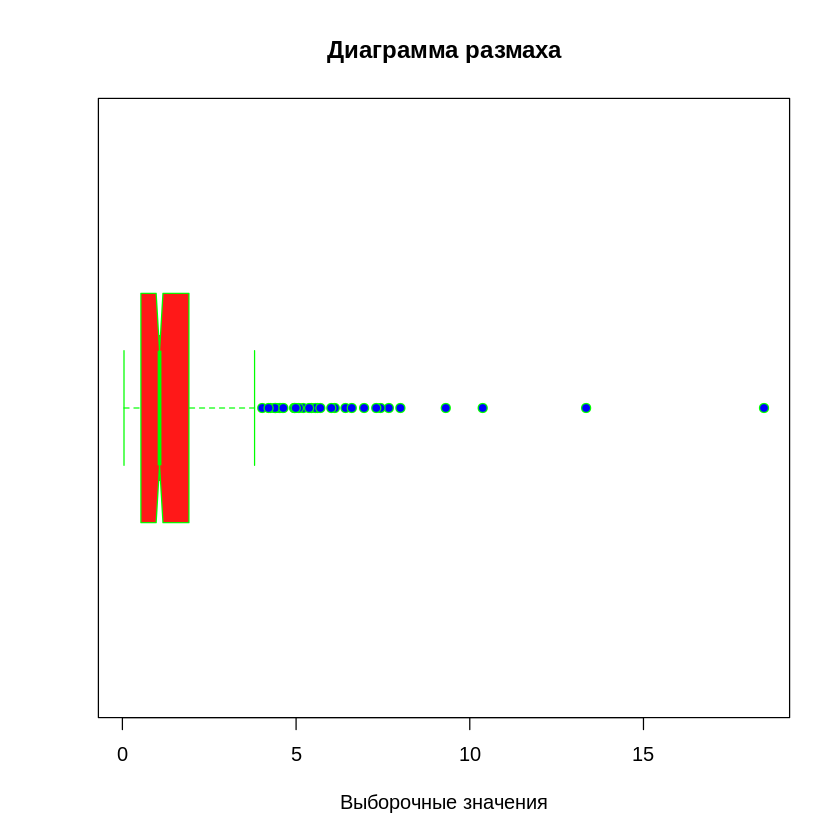

In [121]:
boxplot(ds182$s82, horizontal=TRUE, notch=TRUE, col=rgb(1, 0, 0, 0.9), border="green", main="Диаграмма размаха", xlab="Выборочные значения", outpch=21, outbg="blue")

- В выборке, скорее всего, есть аномальные данные

- Распределение генеральной совокупности, из которой взята выборка, несимметрично ("усы" разной длины)

## Гистограмма

Построим гистограмму, расположив относительную частоту по вертикальной оси, а выборочные значения по горизонтальной, и добавим на нее график плотности нормального распределения:

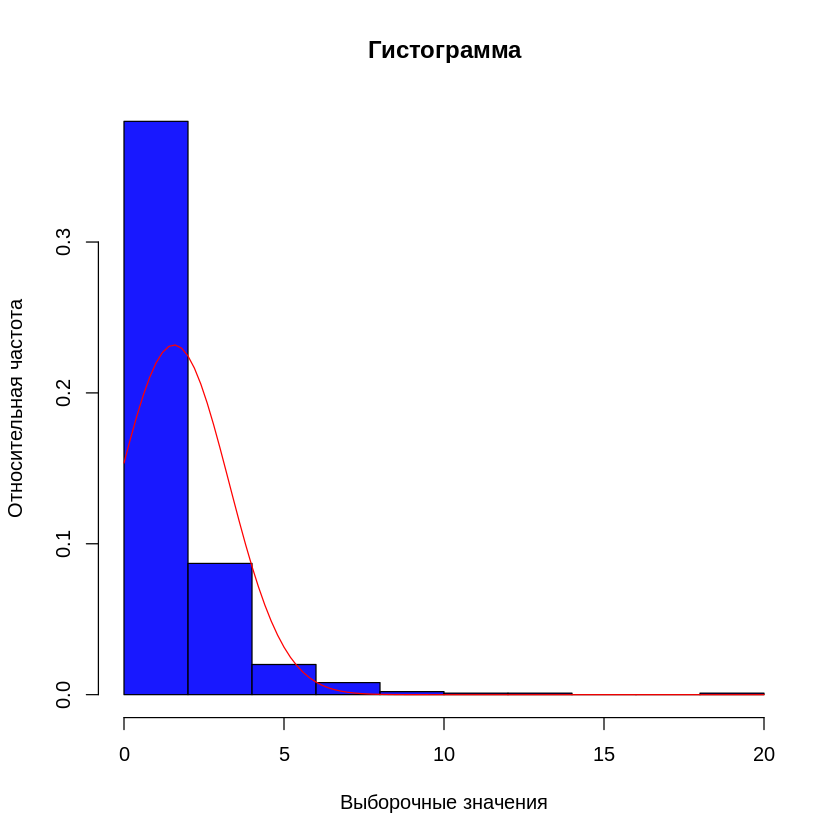

In [122]:
hist(ds182$s82, prob=TRUE, col=rgb(0, 0, 1, 0.9), main="Гистограмма", xlab="Выборочные значения", ylab="Относительная частота")

curve(dnorm(x, mean=mean_82, sd=sd_82), col="red", add=TRUE)

- Распределение генеральной совокупности, из которой взята выборка, несимметрично. Пологая часть графика плотности находится справа

## Выводы

- В выборке присутствуют аномальные данные.
- Распределение генеральной совокупности является несимметричным, пологая часть кривой распределения расположена справа

# Проверка на симметричность

Проведём первый тест, основанный на сравнении выборочного среднего с выборочной медианой, вычисляем наблюдаемое значение и критическое:

In [123]:
n <- length(ds182$s82)
xn1 <- abs(mean_82 - median_82)
xk1 <- 3 * sd_82 / sqrt(n)
print(xn1)
print(xk1)
print(xn1 > xk1)

[1] 0.4919518
[1] 0.230865
[1] TRUE


Наблюдаемое значение больше критического, значит, тест отвергает гипотезу о симметричности генеральной совокупности

Проведём второй тест, основанный на оценке величины выборочного коэффициента асимметричности, вычисляем наблюдаемое значение и критическое:

In [124]:
xn2 <- abs(skewness_82)
xk2 <- 3 * sqrt(6 * (n - 1) / ((n + 1) * (n + 3)))
print(xn2)
print(xk2)
print(xn2 > xk2)

[1] 3.847964
[1] 0.3269974
[1] TRUE


Наблюдаемое значение больше критического, значит, тест отвергает гипотезу о симметричности генеральной совокупности

В обоих тестах наблюдаемые значения получились **больше** критических, из чего следует, что гипотеза о симметричности генеральной совокупности может быть отвергнута.

На основании диаграмм и тестов можно сделать вывод, что гипотеза о симметричности отвергнута

# Отбор данных

Гипотеза о симметричности генеральной совокупности отвергнута, поэтому практически все элементы выборки из этой совокупности содержатся в интервале $(\overline x - 5s, \overline x + 5s)$, где:
- $\overline x$ - выборочное среднее;
- $s$ - несмещенное выборочное среднее квадратическое отклонение (выборочное стандартное отклонение).

Вычислим границы интервала:

In [125]:
A <- mean_82 - 5 * sd_82
B <- mean_82 + 5 * sd_82
print(A)
print(B)

[1] -7.042096
[1] 10.16557


Найдем аномальные значения, лежащие вне интервала:

In [126]:
anomaly <- subset(ds182, (ds182$s82 <= A) | (ds182$s82 >= B))
print(anomaly)

         s82
277 13.34854
290 18.46952
464 10.37155


Были обнаружены аномальные данные в количестве 3 штук. Выведем новую таблицу с отобранными данными:

In [127]:
ds82_checked <- subset(ds182, ds182$s82 > A & ds182$s82 < B)

ds82_checked

,s82
,<dbl>
1,5.4434775
2,2.4993958
3,3.0673115
4,0.4202940
5,0.9614653
6,0.1610242
7,1.1869022
8,6.4217106
9,0.7846164


# Заключение

Целью работы была очистка данных одномерной выборки, т.е. поиск и удаление аномальных значений. Цель достигнута.

В ходе работы были построены и проанализированы диаграммы рассеяния, размаха и гистограмма. На основе данного анализа сделан предварительный вывод о несимметричности генеральной совокупности

На основании двух тестов гипотеза о симметричности генеральной совокупности была отвергнута.

На основании сделанного вывода определили интервал, вне которого лежат выбросы, и провели очистку данных, избавившись от аномальных (было обнаружено 3 выброса).